In [12]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np


In [13]:
# YOUR CODE HERE
file_path = '/Users/Nsumbana/Downloads/exchange_rate_to_usd.csv'

# Read the CSV file
data = pd.read_csv(file_path)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5167 entries, 0 to 5166
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   date                        5167 non-null   object 
 1   chinese_yuan_to_usd         4794 non-null   float64
 2   euro_to_usd                 5099 non-null   float64
 3   japanese_yen_to_usd         4886 non-null   float64
 4   uk_pound_to_usd             5074 non-null   float64
 5   us_dollar_to_usd            5167 non-null   float64
 6   algerian_dinar_to_usd       3276 non-null   float64
 7   australian_dollar_to_usd    4937 non-null   float64
 8   bahrain_dinar_to_usd        3762 non-null   float64
 9   botswana_pula_to_usd        4836 non-null   float64
 10  brazilian_real_to_usd       4690 non-null   float64
 11  brunei_dollar_to_usd        4847 non-null   float64
 12  canadian_dollar_to_usd      4784 non-null   float64
 13  chilean_peso_to_usd         4917 

In [37]:
selected_features = data[['date','chinese_yuan_to_usd', 'euro_to_usd', 'uk_pound_to_usd',
                     'japanese_yen_to_usd',
                     'indian_rupee_to_usd',
                     'swiss_franc_to_usd',
                     'brazilian_real_to_usd',
                     'russian_ruble_to_usd',
                     'south_african_rand_to_usd',
                     'qatari_riyal_to_usd']]

selected_features.head()

,date,chinese_yuan_to_usd,euro_to_usd,uk_pound_to_usd,japanese_yen_to_usd,indian_rupee_to_usd,swiss_franc_to_usd,brazilian_real_to_usd,russian_ruble_to_usd,south_african_rand_to_usd,qatari_riyal_to_usd
0,2004-01-02,NaN,1.2592,1.7858,NaN,0.021935,NaN,0.346212,NaN,0.149813,0.274725
1,2004-01-05,0.120817,1.2657,1.7996,0.009355,0.021920,0.812876,0.346572,0.033951,0.157233,0.274725
2,2004-01-06,0.120815,1.2756,1.8209,0.009412,0.021920,0.813008,0.349418,0.034194,0.154440,0.274725
3,2004-01-07,0.120814,1.2679,1.8140,0.009413,0.021915,0.807363,0.350877,0.034194,NaN,0.274725
4,2004-01-08,0.120814,1.2634,1.8122,0.009421,0.021959,0.802053,0.348250,NaN,0.150602,0.274725


In [19]:
selected_features.size

56837

In [38]:
selected_features.dtypes

date                         datetime64[ns]
chinese_yuan_to_usd                 float64
euro_to_usd                         float64
uk_pound_to_usd                     float64
japanese_yen_to_usd                 float64
indian_rupee_to_usd                 float64
swiss_franc_to_usd                  float64
brazilian_real_to_usd               float64
russian_ruble_to_usd                float64
south_african_rand_to_usd           float64
qatari_riyal_to_usd                 float64
dtype: object

In [22]:
data['date'] = pd.to_datetime(data['date'])

In [39]:
business_days = pd.bdate_range(start='2004-01-01', end='2024-07-01')
df_bd  = pd.DataFrame({'date': business_days})
selected_features = pd.merge(df_bd, selected_features, on='date', how='left')
selected_features.head(20)

#business_days = pd.bdate_range(start='1978-12-29', end='2024-07-15')
#df_bd = pd.DataFrame({'DATE': business_days})
#df_gold = pd.merge(df_bd, df, on='DATE', how='left')
#df_gold


,date,chinese_yuan_to_usd,euro_to_usd,uk_pound_to_usd,japanese_yen_to_usd,indian_rupee_to_usd,swiss_franc_to_usd,brazilian_real_to_usd,russian_ruble_to_usd,south_african_rand_to_usd,qatari_riyal_to_usd
0,2004-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2004-01-02,NaN,1.2592,1.7858,NaN,0.021935,NaN,0.346212,NaN,0.149813,0.274725
2,2004-01-05,0.120817,1.2657,1.7996,0.009355,0.021920,0.812876,0.346572,0.033951,0.157233,0.274725
3,2004-01-06,0.120815,1.2756,1.8209,0.009412,0.021920,0.813008,0.349418,0.034194,0.154440,0.274725
4,2004-01-07,0.120814,1.2679,1.8140,0.009413,0.021915,0.807363,0.350877,0.034194,NaN,0.274725
5,2004-01-08,0.120814,1.2634,1.8122,0.009421,0.021959,0.802053,0.348250,NaN,0.150602,0.274725
6,2004-01-09,0.120817,1.2737,1.8365,0.009298,0.021978,0.813935,0.349895,0.034493,0.148478,0.274725
7,2004-01-12,0.120817,1.2828,1.8523,NaN,0.022017,0.821558,0.351939,0.034637,0.148368,0.274725
8,2004-01-13,0.120820,1.2749,1.8450,0.009387,0.022012,0.814664,0.355177,0.034621,0.143678,0.274725
9,2004-01-14,0.120820,1.2692,1.8360,0.009414,0.022022,0.812348,0.356964,0.034639,0.138889,0.274725


In [44]:
selected_features.set_index('date',inplace=True)


In [45]:
selected_features.head()

,chinese_yuan_to_usd,euro_to_usd,uk_pound_to_usd,japanese_yen_to_usd,indian_rupee_to_usd,swiss_franc_to_usd,brazilian_real_to_usd,russian_ruble_to_usd,south_african_rand_to_usd,qatari_riyal_to_usd
date,,,,,,,,,,
2004-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-02,NaN,1.2592,1.7858,NaN,0.021935,NaN,0.346212,NaN,0.149813,0.274725
2004-01-05,0.120817,1.2657,1.7996,0.009355,0.021920,0.812876,0.346572,0.033951,0.157233,0.274725
2004-01-06,0.120815,1.2756,1.8209,0.009412,0.021920,0.813008,0.349418,0.034194,0.154440,0.274725
2004-01-07,0.120814,1.2679,1.8140,0.009413,0.021915,0.807363,0.350877,0.034194,NaN,0.274725


In [46]:
selected_features.isnull().sum()

chinese_yuan_to_usd          561
euro_to_usd                  256
uk_pound_to_usd              281
japanese_yen_to_usd          469
indian_rupee_to_usd          617
swiss_franc_to_usd           385
brazilian_real_to_usd        664
russian_ruble_to_usd         571
south_african_rand_to_usd    661
qatari_riyal_to_usd          543
dtype: int64

In [42]:
selected_features.isnull().sum().sort_values(ascending=False) / len(selected_features) 

brazilian_real_to_usd        0.124159
south_african_rand_to_usd    0.123598
indian_rupee_to_usd          0.115370
russian_ruble_to_usd         0.106769
chinese_yuan_to_usd          0.104899
qatari_riyal_to_usd          0.101533
japanese_yen_to_usd          0.087696
swiss_franc_to_usd           0.071990
uk_pound_to_usd              0.052543
euro_to_usd                  0.047868
date                         0.000000
dtype: float64

In [47]:
selected_features = selected_features.bfill()

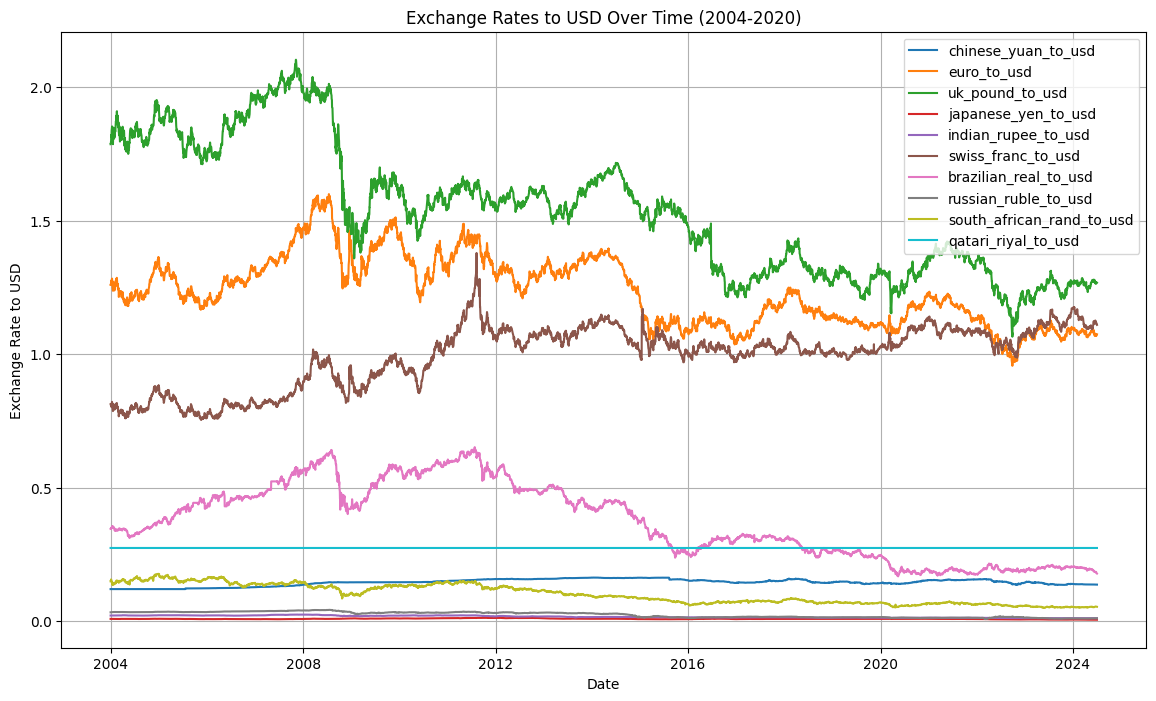

In [54]:
plt.figure(figsize=(14, 8))

# Plot each feature
for column in ['chinese_yuan_to_usd', 'euro_to_usd', 'uk_pound_to_usd', 'japanese_yen_to_usd',
               'indian_rupee_to_usd', 'swiss_franc_to_usd', 'brazilian_real_to_usd', 'russian_ruble_to_usd',
               'south_african_rand_to_usd', 'qatari_riyal_to_usd']:
    plt.plot(selected_features.index, selected_features[column], label=column)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Exchange Rate to USD')
plt.title('Exchange Rates to USD Over Time (2004-2020)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()